## Seaborn Intro

In [1]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

 Install and Import Seaborn

In [2]:
import seaborn as sns

In [3]:
# only data scientists in the US 
df_DS_US = df[(df['job_title_short'].str.contains('Data Scientist', case=False, na=False)) & (df['job_country'] == 'United States')] .copy()
# drop rows with no salary info
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

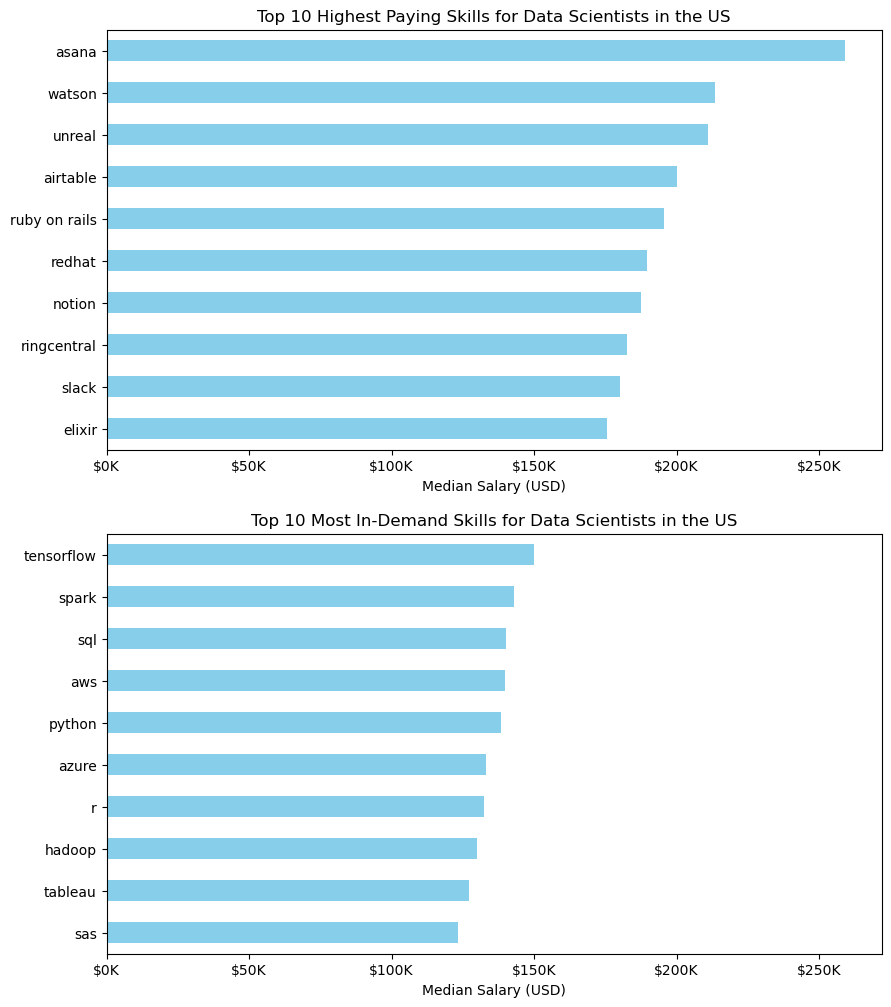

In [ ]:
df_DS_US = df_DS_US.explode('job_skills')

df_DS_Top_pay = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DS_Top_pay = df_DS_Top_pay.head(10)

df_DS_Top_Skill = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DS_Top_Skill = df_DS_Top_Skill.head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Top 10 highest paying skills for Data Scientists in the US
df_DS_Top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue',legend=False)
# ax[0].invert_yaxis() [we could do this or even we could do that [::-1] to invert yaxis]
ax[0].set_title('Top 10 Highest Paying Skills for Data Scientists in the US')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000)}K'))

# Top 10 most in-demand skills for Data Scientists in the US
df_DS_Top_Skill[::-1].plot(kind='barh', y='median', ax=ax[1], color='skyblue', legend=False)
# ax[1].invert_yaxis() [we could do this or even we could do that [::-1] to invert yaxis]
ax[1].set_title('Top 10 Most In-Demand Skills for Data Scientists in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000)}K'))

ax[1].set_xlim(ax[0].get_xlim())
plt.show()

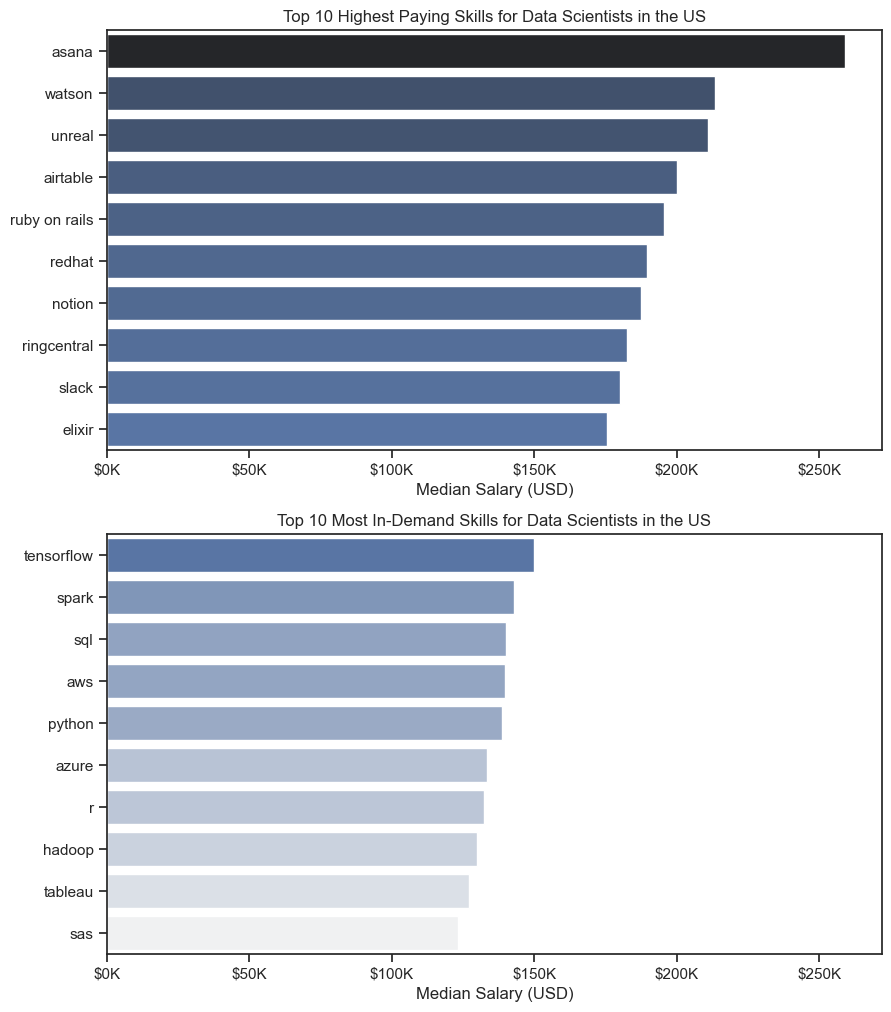

In [44]:
df_DS_US = df_DS_US.explode('job_skills')

df_DS_Top_pay = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DS_Top_pay = df_DS_Top_pay.head(10)

df_DS_Top_Skill = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DS_Top_Skill = df_DS_Top_Skill.head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))
sns.set_theme(style="ticks")

# Top 10 highest paying skills for Data Scientists in the US
sns.barplot(data=df_DS_Top_pay, y=df_DS_Top_pay.index, x='median', ax=ax[0], hue='median', palette='dark:b_r', legend=False)
#df_DS_Top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue',legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Scientists in the US')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000)}K'))

# Top 10 most in-demand skills for Data Scientists in the US
sns.barplot(data=df_DS_Top_Skill, y=df_DS_Top_Skill.index, x='median', ax=ax[1], hue='median', palette='light:b', legend=False)
#df_DS_Top_Skill[::-1].plot(kind='barh', y='median', ax=ax[1], color='salmon', legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Scientists in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000)}K'))

ax[1].set_xlim(ax[0].get_xlim())
plt.show()

## Histogram

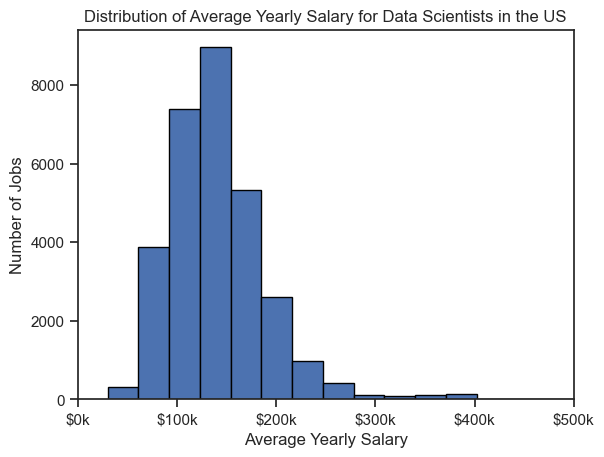

In [17]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Distribution of Average Yearly Salary for Data Scientists in the US')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0, 500000)
plt.figsize=(12, 6)

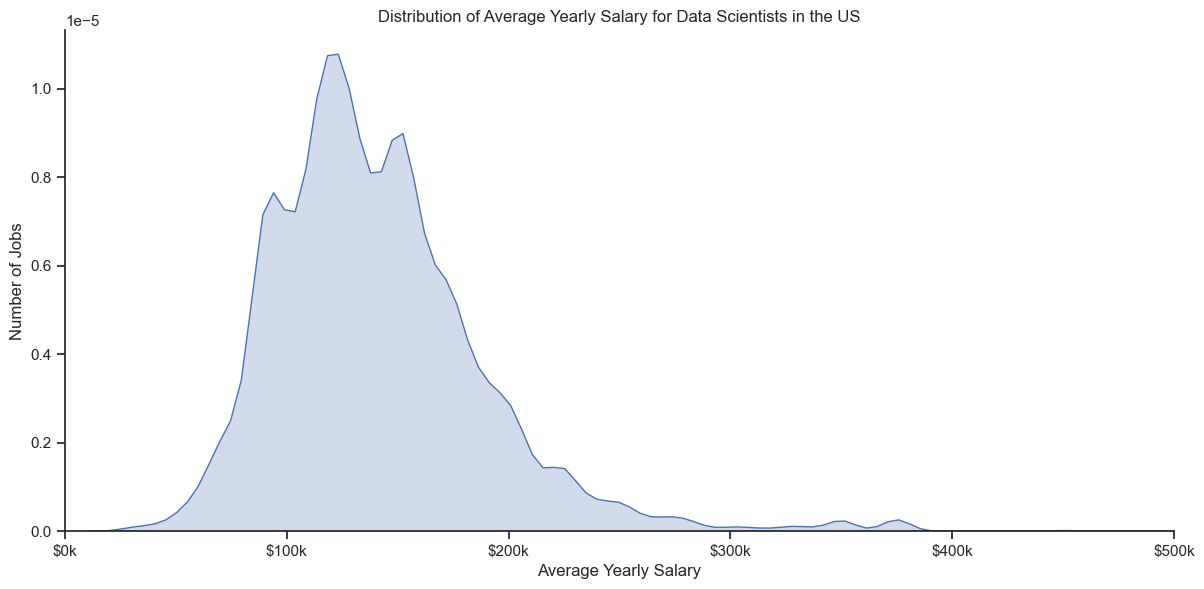

In [45]:
sns.displot(df_DS_US['salary_year_avg'], kind='kde', fill=True, height=6, aspect=2)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Distribution of Average Yearly Salary for Data Scientists in the US')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0, 500000)
plt.figsize=(12, 6)

# Boxplot

C:\Users\OKKKKK\AppData\Local\Temp\ipykernel_13760\1275112159.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),medianprops=dict(color='grey', linewidth=1),labels=job_titles)


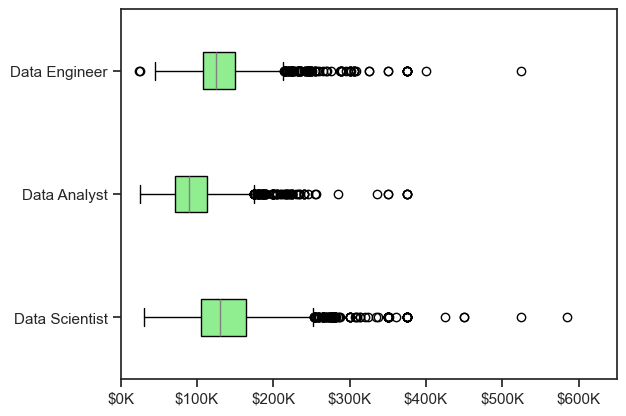

In [ ]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']

# filter for selected job titles in the US and drop rows with missing salary info
df_US = df[df['job_title_short'].isin(job_titles) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
#list comprehension to create a list of salary data for each job title
job_list = [df_US[df_US['job_title_short'] == title]['salary_year_avg'] for title in job_titles]
# Create box plot
plt.boxplot(job_list, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),medianprops=dict(color='grey', linewidth=1),labels=job_titles)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 650000)
plt.show()

C:\Users\OKKKKK\AppData\Local\Temp\ipykernel_13760\3749807655.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_lists, vert=False, labels=job_titles)


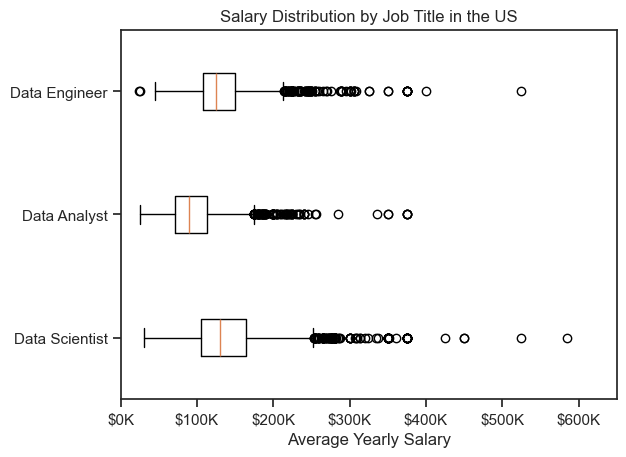

In [51]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']

# filtering for job titles and country
df_US = df[df['job_title_short'].isin(job_titles) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
# list comprehension to create a list of salary series for each job title
job_lists = [df_US[df_US['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

#plotting
plt.boxplot(job_lists, vert=False, labels=job_titles)
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Average Yearly Salary')
plt.ylabel('')
plt.xlim(0, 650000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

C:\Users\OKKKKK\AppData\Local\Temp\ipykernel_13760\3747178161.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', palette='pastel')


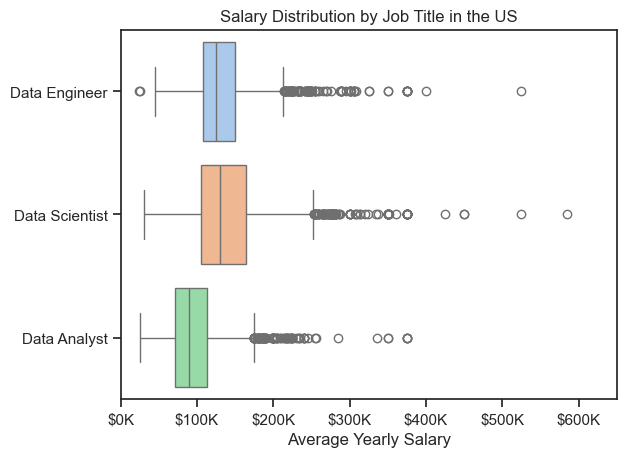

In [50]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', palette='pastel')
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Average Yearly Salary')
plt.ylabel('')
plt.xlim(0, 650000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()